In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
from openpyxl import Workbook  
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
print(tf.__version__)
import numpy as np

2.0.0


In [45]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\학교\4학년 1학기\전력경제\data.xlsx')
dataset=emp1.parse('Sheet1')
dataset = dataset.dropna()
dataset

,최고기온,최저기온,평균기온,운량,일조시간,평일,H0,H1,H2,H3,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,11.0,3.5,6.5,4.5,5.7,0,50423.0,47984.0,46810.0,46665.0,...,58699.0,57766.0,57841.0,57765.0,59661.0,59747.0,57957.0,56806.0,58129.0,58889.0
1,16.2,1.6,8.2,0.0,9.5,1,54720.0,52069.0,50806.0,50362.0,...,56557.0,55764.0,55747.0,55840.0,57951.0,58494.0,57036.0,55993.0,57290.0,57570.0
2,17.9,5.5,12.2,4.5,6.3,1,53445.0,50689.0,49442.0,49238.0,...,56016.0,55712.0,55731.0,55353.0,56565.0,56517.0,55138.0,54542.0,55452.0,55665.0
3,14.8,9.8,12.0,10.0,0.0,1,51302.0,48439.0,47177.0,46950.0,...,57862.0,57368.0,57323.0,57183.0,57568.0,56997.0,55266.0,54243.0,55525.0,55704.0
4,17.2,9.0,12.0,4.8,6.4,1,51390.0,48309.0,46949.0,46645.0,...,56521.0,55741.0,55623.0,54940.0,56092.0,56399.0,54984.0,54111.0,55456.0,55615.0
5,11.0,6.0,8.6,7.9,2.1,0,51599.0,48789.0,47264.0,46811.0,...,51381.0,50857.0,50313.0,49675.0,50672.0,50994.0,50433.0,50459.0,52660.0,53514.0
6,9.1,5.4,6.8,8.9,0.4,0,50047.0,47402.0,46079.0,45519.0,...,42941.0,42673.0,42920.0,43808.0,46334.0,47767.0,47778.0,48147.0,50465.0,50703.0
7,6.3,1.1,2.9,9.4,0.0,0,47230.0,44425.0,43176.0,42867.0,...,50100.0,49842.0,49741.0,49821.0,51522.0,52151.0,51838.0,51891.0,53807.0,54174.0
8,4.8,0.6,2.7,7.5,0.0,1,50729.0,47911.0,46510.0,46437.0,...,59881.0,59516.0,59736.0,59469.0,59987.0,59757.0,57705.0,56444.0,57769.0,58348.0
9,10.2,-1.5,4.4,4.6,8.2,1,54486.0,51699.0,50378.0,50077.0,...,57391.0,56688.0,57203.0,57393.0,58512.0,58481.0,56795.0,55943.0,57185.0,57620.0


In [46]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80퍼센트 정보를 랜덤하게 가져옴
test_dataset = dataset.drop(train_dataset.index)

In [47]:
train_stats = train_dataset.describe()
for i in range(0,24):
    train_stats.pop("H%d"%i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
최고기온,23.0,8.708696,4.366912,0.5,6.15,7.9,10.60,17.9
최저기온,23.0,1.256522,3.219659,-4.0,-1.25,1.0,3.25,9.0
평균기온,23.0,4.856522,3.451459,-1.4,2.55,4.5,6.80,12.2
운량,23.0,6.282609,2.757412,0.0,4.70,6.1,8.65,9.4
일조시간,23.0,4.039130,3.657463,0.0,0.45,3.4,6.35,10.3
평일,23.0,0.565217,0.506870,0.0,0.00,1.0,1.00,1.0


In [48]:
train_dataset

,최고기온,최저기온,평균기온,운량,일조시간,평일,H0,H1,H2,H3,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
2,17.9,5.5,12.2,4.5,6.3,1,53445.0,50689.0,49442.0,49238.0,...,56016.0,55712.0,55731.0,55353.0,56565.0,56517.0,55138.0,54542.0,55452.0,55665.0
20,12.6,1.2,7.2,5.4,3.4,0,51175.0,48580.0,47184.0,46745.0,...,44984.0,44959.0,45326.0,46147.0,47863.0,48926.0,48851.0,49090.0,51110.0,50918.0
23,3.1,-1.9,-0.1,6.1,4.0,1,54563.0,51665.0,50471.0,50438.0,...,59371.0,59210.0,59749.0,59472.0,59819.0,60161.0,58533.0,57360.0,58412.0,58981.0
13,7.8,2.6,4.9,7.8,3.2,0,51608.0,48767.0,47285.0,46757.0,...,45645.0,45385.0,45302.0,46007.0,48292.0,49738.0,49720.0,49932.0,52292.0,52649.0
11,9.5,3.9,6.4,9.4,2.2,1,53426.0,50591.0,49241.0,48854.0,...,58001.0,57752.0,58317.0,58476.0,58896.0,58284.0,56594.0,55583.0,56774.0,57101.0
25,8.9,-1.7,4.5,6.0,6.1,1,55265.0,52680.0,51498.0,51282.0,...,57518.0,57008.0,57282.0,57263.0,57812.0,58202.0,56608.0,55517.0,56890.0,56930.0
27,7.1,-0.7,2.7,1.9,10.3,0,50783.0,48355.0,46857.0,46574.0,...,44623.0,44250.0,44356.0,44734.0,46931.0,49525.0,49595.0,50018.0,52065.0,52065.0
26,11.3,1.1,6.8,9.3,0.0,0,52987.0,50166.0,48717.0,48298.0,...,52129.0,51657.0,51254.0,50231.0,51002.0,51632.0,51218.0,51237.0,53262.0,54215.0
5,11.0,6.0,8.6,7.9,2.1,0,51599.0,48789.0,47264.0,46811.0,...,51381.0,50857.0,50313.0,49675.0,50672.0,50994.0,50433.0,50459.0,52660.0,53514.0
14,7.7,1.0,4.1,5.9,4.5,0,49231.0,46652.0,45373.0,45384.0,...,59644.0,59434.0,59674.0,59411.0,60079.0,59999.0,58141.0,56595.0,57854.0,58223.0


In [49]:
train_out = train_dataset.copy()
test_out= test_dataset.copy()

In [50]:
train_out.pop('최고기온') 
train_out.pop('최저기온')
train_out.pop('평균기온')
train_out.pop('운량')
train_out.pop('평일')
train_out.pop('일조시간')
train_out

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
2,53445.0,50689.0,49442.0,49238.0,50198.0,51899.0,53506.0,54493.0,57391.0,58735.0,...,56016.0,55712.0,55731.0,55353.0,56565.0,56517.0,55138.0,54542.0,55452.0,55665.0
20,51175.0,48580.0,47184.0,46745.0,47517.0,48409.0,48087.0,46440.0,44878.0,44706.0,...,44984.0,44959.0,45326.0,46147.0,47863.0,48926.0,48851.0,49090.0,51110.0,50918.0
23,54563.0,51665.0,50471.0,50438.0,51453.0,53021.0,54798.0,56293.0,59079.0,60512.0,...,59371.0,59210.0,59749.0,59472.0,59819.0,60161.0,58533.0,57360.0,58412.0,58981.0
13,51608.0,48767.0,47285.0,46757.0,47381.0,48295.0,48272.0,46518.0,45069.0,44870.0,...,45645.0,45385.0,45302.0,46007.0,48292.0,49738.0,49720.0,49932.0,52292.0,52649.0
11,53426.0,50591.0,49241.0,48854.0,49485.0,50871.0,52748.0,54258.0,57488.0,59613.0,...,58001.0,57752.0,58317.0,58476.0,58896.0,58284.0,56594.0,55583.0,56774.0,57101.0
25,55265.0,52680.0,51498.0,51282.0,52158.0,53466.0,55210.0,56679.0,59285.0,60940.0,...,57518.0,57008.0,57282.0,57263.0,57812.0,58202.0,56608.0,55517.0,56890.0,56930.0
27,50783.0,48355.0,46857.0,46574.0,47206.0,48276.0,48403.0,46754.0,44764.0,44424.0,...,44623.0,44250.0,44356.0,44734.0,46931.0,49525.0,49595.0,50018.0,52065.0,52065.0
26,52987.0,50166.0,48717.0,48298.0,49053.0,50211.0,50712.0,50765.0,51841.0,52428.0,...,52129.0,51657.0,51254.0,50231.0,51002.0,51632.0,51218.0,51237.0,53262.0,54215.0
5,51599.0,48789.0,47264.0,46811.0,47822.0,49580.0,50600.0,50065.0,51174.0,51873.0,...,51381.0,50857.0,50313.0,49675.0,50672.0,50994.0,50433.0,50459.0,52660.0,53514.0
14,49231.0,46652.0,45373.0,45384.0,46558.0,48303.0,50829.0,53414.0,57734.0,60245.0,...,59644.0,59434.0,59674.0,59411.0,60079.0,59999.0,58141.0,56595.0,57854.0,58223.0


In [51]:
test_out.pop('최고기온') 
test_out.pop('최저기온')
test_out.pop('평균기온')
test_out.pop('운량')
test_out.pop('일조시간')
test_out.pop('평일')

test_out

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23
0,50423.0,47984.0,46810.0,46665.0,47591.0,48984.0,50789.0,52882.0,58089.0,61121.0,...,58699.0,57766.0,57841.0,57765.0,59661.0,59747.0,57957.0,56806.0,58129.0,58889.0
3,51302.0,48439.0,47177.0,46950.0,48061.0,49771.0,51125.0,51876.0,55102.0,57183.0,...,57862.0,57368.0,57323.0,57183.0,57568.0,56997.0,55266.0,54243.0,55525.0,55704.0
12,53173.0,50322.0,48784.0,48548.0,49443.0,50761.0,51689.0,52047.0,53235.0,54311.0,...,52988.0,52213.0,51405.0,50464.0,51882.0,52359.0,51773.0,51723.0,53853.0,54973.0
15,54323.0,51404.0,50127.0,50020.0,50886.0,52392.0,54311.0,55962.0,59591.0,61400.0,...,60424.0,60300.0,60707.0,60930.0,61506.0,61104.0,59240.0,57851.0,59242.0,59958.0
21,47352.0,44738.0,43585.0,43575.0,44797.0,46753.0,48875.0,51477.0,55981.0,58711.0,...,58387.0,57531.0,57091.0,56798.0,57580.0,58220.0,56684.0,55707.0,57132.0,57581.0
24,54987.0,52300.0,51025.0,50788.0,51554.0,52898.0,54587.0,56375.0,59533.0,61490.0,...,59413.0,58725.0,58320.0,58267.0,59704.0,60837.0,59118.0,57731.0,58851.0,59207.0


In [52]:
train_input = train_dataset.copy()
test_input = test_dataset.copy()

In [53]:
for i in range(0,24):
    train_input.pop('H%d'%i)
train_input

for i in range(0,24):
    test_input.pop('H%d'%i)
test_input

,최고기온,최저기온,평균기온,운량,일조시간,평일
0,11.0,3.5,6.5,4.5,5.7,0
3,14.8,9.8,12.0,10.0,0.0,1
12,10.7,2.0,6.0,7.1,4.0,0
15,5.7,-3.9,1.5,9.1,1.1,1
21,11.1,2.8,7.9,8.3,1.0,0
24,4.6,-2.8,0.5,1.1,11.0,1


In [54]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']     #std =standard deviation 표준편차 
normed_train_data = norm(train_input)
normed_test_data = norm(test_input)

In [55]:
emp2=pd.ExcelFile(r'C:\Users\LG\Desktop\학교\4학년 1학기\전력경제\data2.xlsx')
dataset2=emp2.parse('Sheet1')
dataset2

,최고기온,최저기온,평균기온,운량,일조시간,평일
0,13.8,4.3,8.7,6.5,7.4,1


In [56]:
normed_predict_data= norm(dataset2)
normed_predict_data

,최고기온,최저기온,평균기온,운량,일조시간,평일
0,1.165882,0.94528,1.113581,0.078839,0.918907,0.85778


In [57]:
train_outs = train_out.describe()
train_outs = train_outs.transpose()
train_outs

,count,mean,std,min,25%,50%,75%,max
H0,23.0,52593.434783,2448.091183,47230.0,50979.0,53162.0,54524.5,56512.0
H1,23.0,49824.826087,2428.497078,44425.0,48332.0,50250.0,51682.0,53730.0
H2,23.0,48489.347826,2471.587503,43176.0,46903.0,48980.0,50424.5,52640.0
H3,23.0,48199.391304,2449.527927,42867.0,46609.5,48605.0,50219.5,52181.0
H4,23.0,49086.130435,2372.356602,43978.0,47404.0,49485.0,50976.5,52954.0
H5,23.0,50469.173913,2365.575764,45326.0,48356.0,50871.0,52367.0,54025.0
H6,23.0,51782.478261,2807.498448,45911.0,50316.0,51773.0,54031.0,55772.0
H7,23.0,52484.565217,3931.241821,45293.0,50415.0,53414.0,55643.5,57269.0
H8,23.0,54495.782609,5643.771136,43920.0,51507.5,57500.0,58757.5,59877.0
H9,23.0,55896.565217,6442.286324,43668.0,52150.5,59814.0,60382.0,62029.0


In [58]:
len(train_input.keys())

6

In [59]:
def norm2(x):
    return (x - train_outs['mean']) / train_outs['std']     #std =standard deviation 표준편차 
normed_train_outs = norm2(train_out)
normed_test_outs = norm2(test_out)


In [60]:
def build_model():
    model = keras.Sequential([
        layers.Dense(5, activation='relu', input_shape=[len(train_input.keys())]),
        layers.Dense(100, activation = 'relu'),
        layers.Dropout(0.5),
        
        layers.Dense(300, activation = 'relu'),
        layers.Dropout(0.5),
        
        layers.Dense(400, activation = 'relu'),
        layers.Dropout(0.5),
        
        layers.Dense(500, activation = 'relu'),
        layers.Dropout(0.5),
        
        layers.Dense(400, activation = 'relu'),
        layers.Dropout(0.5),
        
        layers.Dense(200, activation = 'relu'),
        layers.Dense(24)
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.003)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse','accuracy',])
    return model

In [61]:
model = build_model()

In [62]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 500
# validation_split 은 20퍼센트가 tsst가 된다
history = model.fit(
    normed_train_data, normed_train_outs,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................


..................................................................................

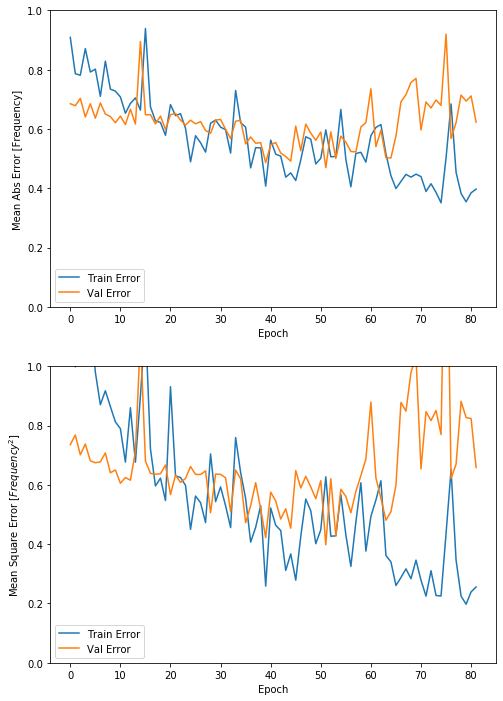

In [69]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(normed_train_data, normed_train_outs, epochs=700,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [70]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,1.093102,0.909331,1.093102,0.000000,0.735570,0.685644,0.735570,0.2,0
1,0.998196,0.786668,0.998196,0.000000,0.768323,0.678687,0.768323,0.0,1
2,1.034912,0.781640,1.034912,0.055556,0.701471,0.703654,0.701471,0.0,2
3,1.022536,0.871332,1.022536,0.000000,0.737732,0.640962,0.737732,0.0,3
4,1.196550,0.792432,1.196550,0.111111,0.681341,0.685373,0.681341,0.0,4
...,...,...,...,...,...,...,...,...,...
77,0.346562,0.454163,0.346562,0.166667,0.669972,0.621687,0.669972,0.0,77
78,0.225002,0.382778,0.225002,0.055556,0.881916,0.714725,0.881916,0.0,78
79,0.197646,0.354585,0.197646,0.111111,0.827162,0.694433,0.827162,0.0,79
80,0.239208,0.384983,0.239208,0.277778,0.823347,0.711703,0.823347,0.0,80


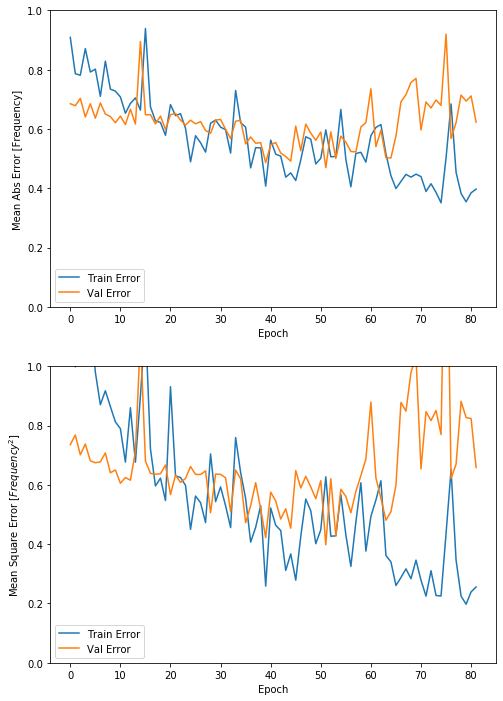

In [71]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Frequency]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Frequency^2$]')
    
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

plot_history(history)

In [72]:
test_predictions = model.predict(normed_test_data).flatten()
test_predictions


array([-0.44197062, -0.41224062, -0.43342397, -0.5049143 , -0.56274354,
       -0.6293646 , -0.8714152 , -1.033112  , -1.1571497 , -1.1151805 ,
       -1.2138577 , -1.1860601 , -1.1574843 , -1.1448351 , -1.1895306 ,
       -1.191572  , -1.1406279 , -1.1229124 , -1.1256951 , -1.1604517 ,
       -1.1745019 , -1.1979516 , -1.1750227 , -1.1916631 , -0.24122274,
       -0.18454033, -0.23235697, -0.24508536, -0.25557518, -0.24284323,
       -0.31030002, -0.30648538, -0.34856772, -0.3097951 , -0.36471927,
       -0.323669  , -0.35494858, -0.32395923, -0.35326412, -0.35622543,
       -0.3053877 , -0.32444555, -0.35399926, -0.36946678, -0.3768316 ,
       -0.36975238, -0.40028378, -0.4028991 , -0.5209505 , -0.48925823,
       -0.5111391 , -0.5981322 , -0.6746562 , -0.7647533 , -1.0761371 ,
       -1.2984091 , -1.4636976 , -1.4080329 , -1.5316556 , -1.4923999 ,
       -1.4559811 , -1.4397349 , -1.4973606 , -1.5019739 , -1.4360697 ,
       -1.4096807 , -1.4015067 , -1.4545722 , -1.4726808 , -1.51

In [73]:

yhat4 = model.predict(normed_predict_data).flatten()
yhat4

array([0.02427629, 0.02250759, 0.01192766, 0.03693712, 0.05234261,
       0.09770262, 0.08943572, 0.11140873, 0.10851096, 0.140903  ,
       0.10509755, 0.1443276 , 0.09929916, 0.13313326, 0.10314463,
       0.10358406, 0.15016225, 0.13188319, 0.12628408, 0.1089454 ,
       0.10804556, 0.08991168, 0.07022408, 0.08840249], dtype=float32)

In [74]:
def re(x):
    return (x * train_outs['std']) + train_outs['mean']     #std =standard deviation 표준편차 


In [75]:
y=re(yhat4)
for i in range (24):
    print(y[i])

52652.86534520374
49879.48571088317
48518.8280920555
48289.86980540997
49210.30576777877
50700.29686871326
52033.56890299692
52922.53985785761
55108.193611027215
56804.302661882146
57194.877966465065
57129.89058850995
53408.57542975395
55234.902208859814
55504.883539384326
55082.786296032704
55420.77914967461
55165.68055639681
56190.065862894
56557.03770031535
55295.979068664834
54465.79292016809
55913.620821203695
56373.83036987633


In [39]:
x = []
for i in range (24):
    x.append(i)
    
print(type(x))    


<class 'list'>


In [40]:
p = test_out.copy()

In [41]:
for i in range(1,6):
    test = re(test_predictions[(i-1)*24:(i)*24])
    print(test)

H0     51361.635276
H1     48653.214080
H2     47110.556525
H3     46700.421718
H4     47575.439649
H5     48890.258782
H6     49331.711767
H7     48210.510963
H8     47863.651419
H9     47970.579975
H10    48839.595352
H11    48999.945776
H12    47291.807555
H13    48071.715215
H14    48171.668413
H15    47644.362986
H16    47559.406214
H17    47522.149561
H18    49096.579822
H19    50006.436500
H20    49854.410361
H21    49979.277932
H22    52160.260310
H23    52648.832350
dtype: float64
H0     51664.313696
H1     48887.589113
H2     47383.697458
H3     46954.577883
H4     47934.223811
H5     49572.568439
H6     50416.671613
H7     49804.210302
H8     50788.297914
H9     51176.239884
H10    52006.567505
H11    52161.701793
H12    49581.264287
H13    50736.503725
H14    50881.144991
H15    50316.670095
H16    49975.724810
H17    49410.872413
H18    50508.824920
H19    50872.689536
H20    50510.843115
H21    50518.629785
H22    52614.668523
H23    53349.359796
dtype: float64
H0     508

In [42]:
def plotgraph(i):
    plt.figure(figsize=(12,8))
    plt.plot(x,re(test_predictions[(i-1)*24:(i)*24]).transpose(),label = 'Predict%d'%i)
    plt.plot(x,p[(i-1):(i)].transpose(), label = 'real%d'%i)
    plt.xlabel('Time')
    plt.ylabel('Predictions')
    plt.ylim([0,65000])
    plt.legend()
    plt.show()


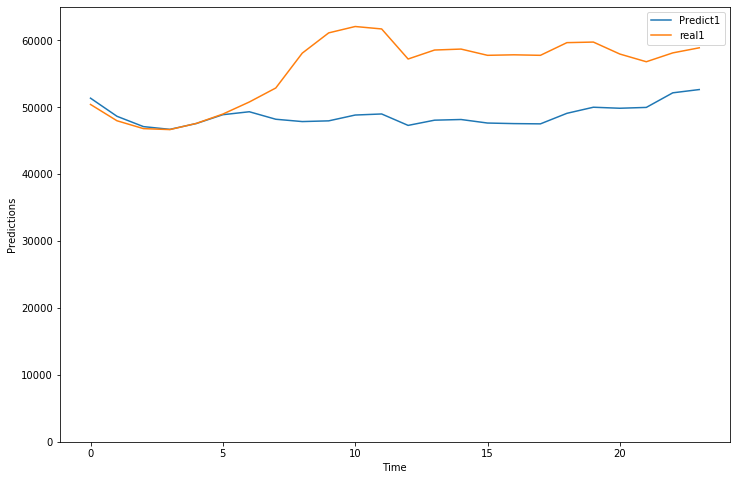

   최고기온  최저기온  평균기온   운량  일조시간  평일
0  11.0   3.5   6.5  4.5   5.7  10


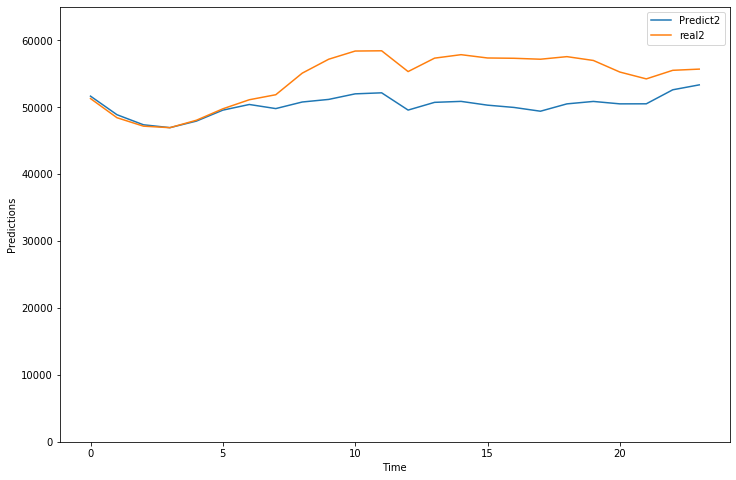

   최고기온  최저기온  평균기온    운량  일조시간  평일
3  14.8   9.8  12.0  10.0   0.0  11


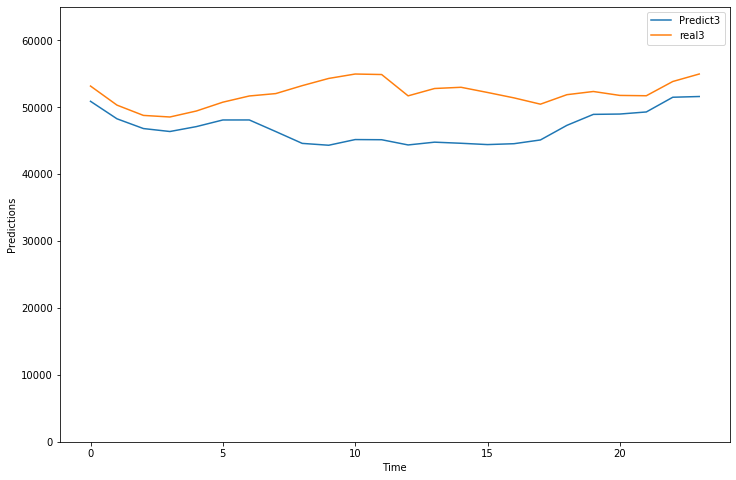

    최고기온  최저기온  평균기온   운량  일조시간  평일
12  10.7   2.0   6.0  7.1   4.0  10


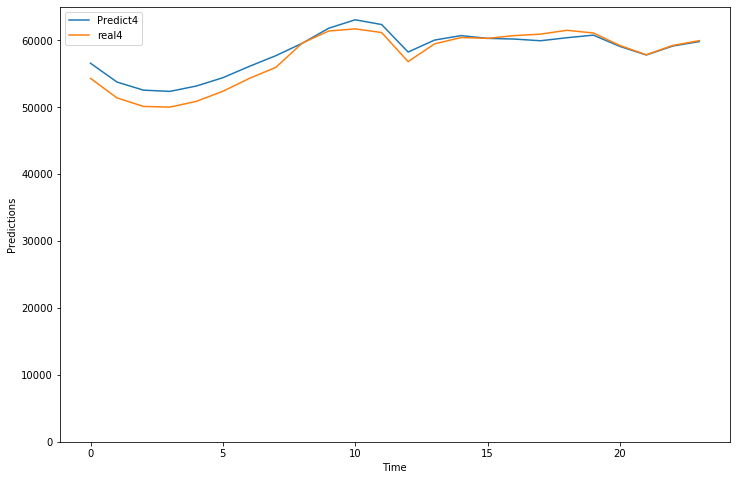

    최고기온  최저기온  평균기온   운량  일조시간  평일
15   5.7  -3.9   1.5  9.1   1.1  11


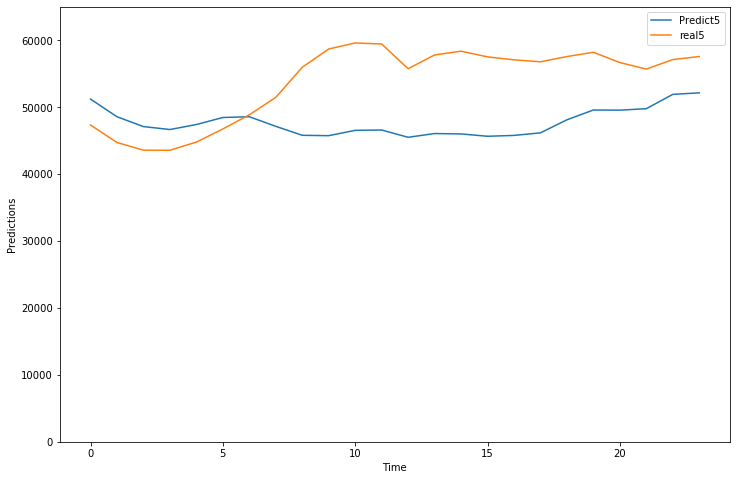

    최고기온  최저기온  평균기온   운량  일조시간  평일
21  11.1   2.8   7.9  8.3   1.0  10


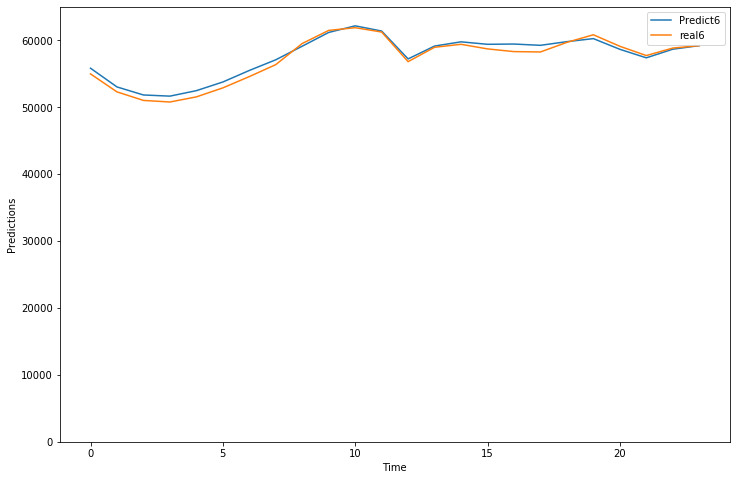

    최고기온  최저기온  평균기온   운량  일조시간  평일
24   4.6  -2.8   0.5  1.1  11.0  11


In [43]:
for j in range(1,7):
    plotgraph(j)
    print(test_input[j-1:j])